In [15]:
import pandas as pd
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import numpy as np

In [7]:
cnn_lstm = pd.read_csv('CNN_LSTM_auROC-auPR.csv',index_col=0)

In [8]:
cnn = pd.read_csv('CNN_auROC-auPR.csv',index_col=0)

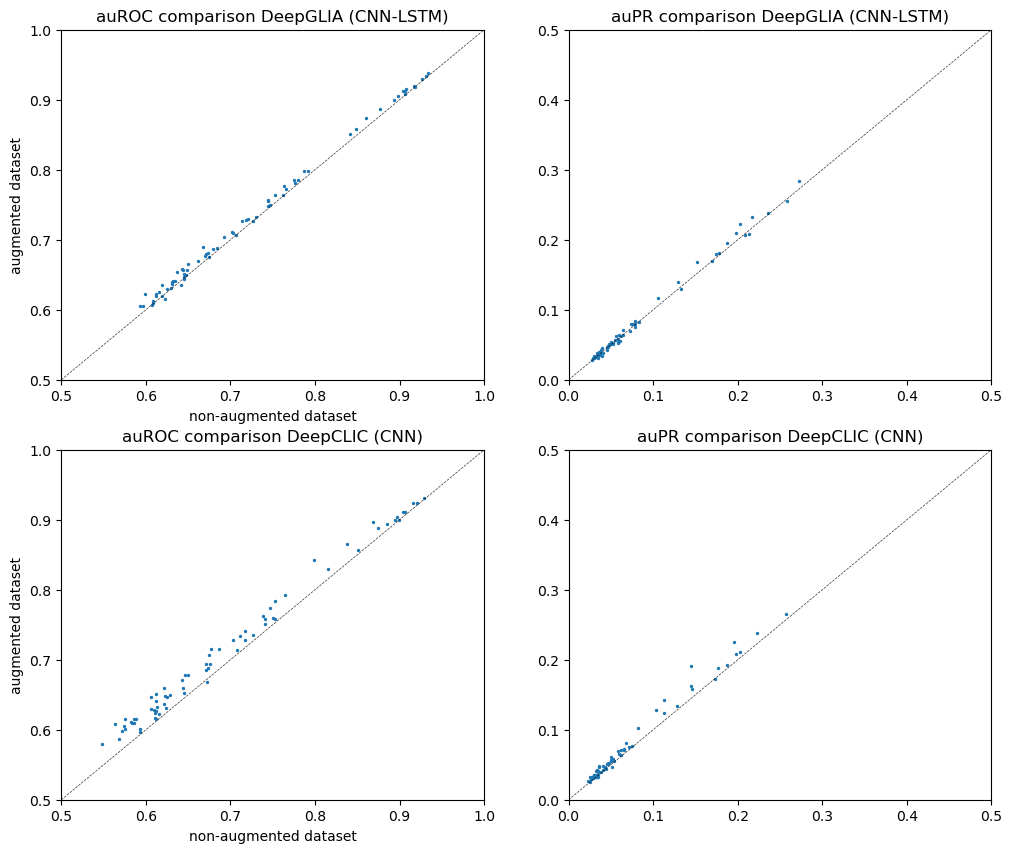

In [61]:
models_dict={'DeepGLIA (CNN-LSTM)':cnn_lstm, 'DeepCLIC (CNN)':cnn}

fig,axs =plt.subplots(2,2,figsize=(12,10))
plt.setp(axs[:,0], xlim=(0.5,1), ylim=(0.5,1),xlabel='non-augmented dataset',ylabel='augmented dataset')
plt.setp(axs[:,1], xlim=(0,0.5), ylim=(0,0.5))


for i,model in enumerate(models_dict):
    axs[i,0].set_title(f'auROC comparison {model}')
    axs[i,0].scatter(models_dict[model]['auROC'],models_dict[model]['auROC_augmented'],s=2)
    
    axs[i,1].set_title(f'auPR comparison {model}')
    axs[i,1].scatter(models_dict[model]['auPR'],models_dict[model]['auPR_augmented'],s=2)

for ax in axs.flatten():
    ax.plot((0,1),(0,1),c='black',linestyle='--',lw=0.5, alpha=0.8)

fig.show()

### paired t-test

In [10]:
ttest_rel(cnn_lstm["auROC"], cnn_lstm["auROC_augmented"], alternative = "two-sided")

Ttest_relResult(statistic=-10.689412250170099, pvalue=1.6353809470750772e-16)

In [11]:
ttest_rel(cnn_lstm["auPR"], cnn_lstm["auPR_augmented"], alternative = "two-sided")

Ttest_relResult(statistic=-3.5843523539898117, pvalue=0.0006113746135130017)

In [12]:
ttest_rel(cnn["auROC"], cnn["auROC_augmented"], alternative = "two-sided")

Ttest_relResult(statistic=-14.12617711801767, pvalue=1.914315182623769e-22)

In [13]:
ttest_rel(cnn["auPR"], cnn["auPR_augmented"], alternative = "two-sided")

Ttest_relResult(statistic=-7.22026475467752, pvalue=4.3302608601250985e-10)

### % diff

In [46]:
round((np.mean(cnn_lstm["auROC_augmented"])-np.mean(cnn_lstm["auROC"])) / np.mean(cnn_lstm["auROC"])*100,2)

0.97

In [47]:
round((np.mean(cnn_lstm["auPR_augmented"])-np.mean(cnn_lstm["auPR"])) / np.mean(cnn_lstm["auPR"])*100,2)

2.63

In [48]:
round((np.mean(cnn["auROC_augmented"])-np.mean(cnn["auROC"])) / np.mean(cnn["auROC"])*100,2)

2.8

In [49]:
round((np.mean(cnn["auPR_augmented"])-np.mean(cnn["auPR"])) / np.mean(cnn["auPR"])*100,2)

10.08